# Loan Data Suport Vector Machine

## Support Vector Machine (SVM) 

### 1. Core Concept
SVM is a **supervised learning algorithm** that finds the optimal **hyperplane** to separate two classes with the **maximum margin**.

### 2. Role of Support Vectors
Support vectors are the **closest points to the decision boundary** from each class, defining the margin width and influencing the hyperplane.

### 3. Decision Boundary and Classification
New data points are **strictly classified** based on which side of the hyperplane they fall, making SVM a **deterministic binary classifier**.

### 4. Effect of Introducing a New Point
- If the new point is **far from the margin**, it does not affect the hyperplane.
- If it is **closer than existing support vectors**, the hyperplane may shift.

### 5. Non-Linearly Separable Data
The **kernel trick** maps data into a higher-dimensional space where it becomes linearly separable.

### 6. Soft-Margin SVM
Allows some misclassifications by introducing a **penalty parameter (C)** to handle overlapping or noisy data.

### 7. Probabilistic Interpretation
SVM does not provide probability scores but can be extended using **Platt Scaling**.



### Data Preprocess

In [1]:
# Load the data
df <- read.csv('loan_data.csv')
summary(df)
str(df)

 credit.policy     purpose             int.rate       installment    
 Min.   :0.000   Length:9578        Min.   :0.0600   Min.   : 15.67  
 1st Qu.:1.000   Class :character   1st Qu.:0.1039   1st Qu.:163.77  
 Median :1.000   Mode  :character   Median :0.1221   Median :268.95  
 Mean   :0.805                      Mean   :0.1226   Mean   :319.09  
 3rd Qu.:1.000                      3rd Qu.:0.1407   3rd Qu.:432.76  
 Max.   :1.000                      Max.   :0.2164   Max.   :940.14  
 log.annual.inc        dti              fico       days.with.cr.line
 Min.   : 7.548   Min.   : 0.000   Min.   :612.0   Min.   :  179    
 1st Qu.:10.558   1st Qu.: 7.213   1st Qu.:682.0   1st Qu.: 2820    
 Median :10.929   Median :12.665   Median :707.0   Median : 4140    
 Mean   :10.932   Mean   :12.607   Mean   :710.8   Mean   : 4561    
 3rd Qu.:11.291   3rd Qu.:17.950   3rd Qu.:737.0   3rd Qu.: 5730    
 Max.   :14.528   Max.   :29.960   Max.   :827.0   Max.   :17640    
   revol.bal         revol.

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : chr  "debt_consolidation" "credit_card" "debt_consolidation" "debt_consolidation" ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : int  0 0 1 1 0 0 0 0 1 1 ...
 $ delinq.2yrs      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ pub.rec          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ not.fully.paid   : int  0 0 0 0 0 0 1 1 0 0 ...


In [2]:
# Since inq.last.6mths, delinq.2yrs, pub.rec, not.fully.paid, credit.policy should be factore, convert them to factors
library(dplyr)
df <- df %>% mutate(across(c(inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit.policy), as.factor))
str(df)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ purpose          : chr  "debt_consolidation" "credit_card" "debt_consolidation" "debt_consolidation" ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : Factor w/ 28 levels "0","1","2","3",..: 1 1 2 2 1 1 1 1 2 2 ...
 $ delinq.2yrs      : Factor w/ 11 levels "0","1","2","3",..: 1 1 1 1 2 1 1 1 1 1 ...
 $ pub.rec          : Factor w/ 6 levels "0","1","2","3",..: 1 1 1 1 1 1 2 1 1 1 ...
 $ not.

## Exprolatory Data Analysis

#### Fico Score Histogram colored by not.fully.paid

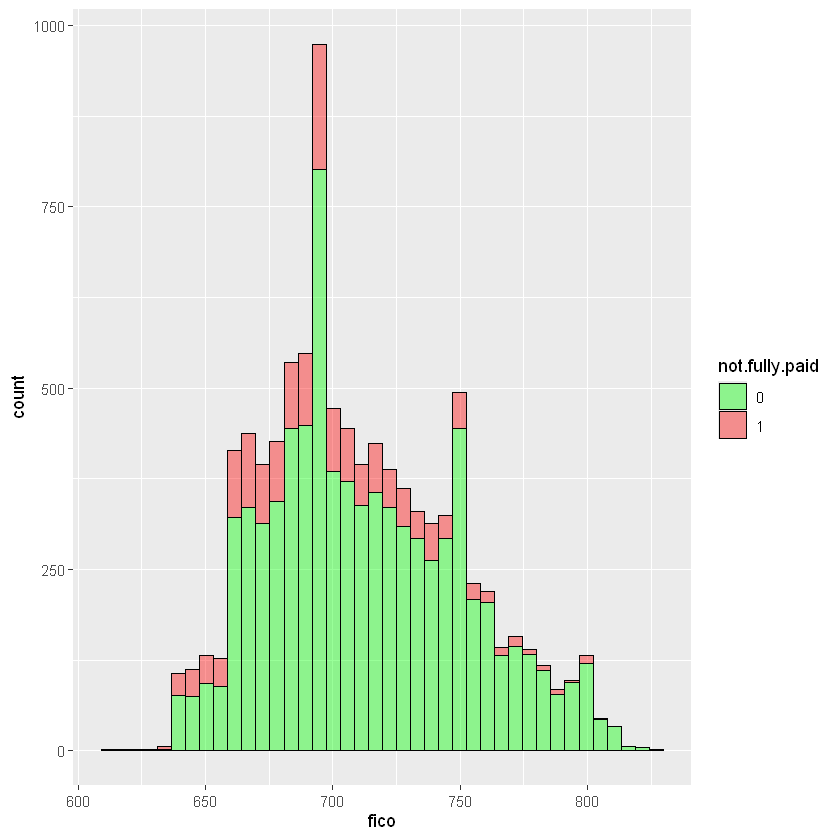

In [3]:
library(ggplot2)
pl <- ggplot(df, aes(x=fico)) + geom_histogram(aes(fill=not.fully.paid), color='black', position=position_stack(reverse=T), bins=40, alpha=0.4) + scale_fill_manual(values =c('green','red'))
pl

#### Barplot of purpose counts, colored by not.fully.paid

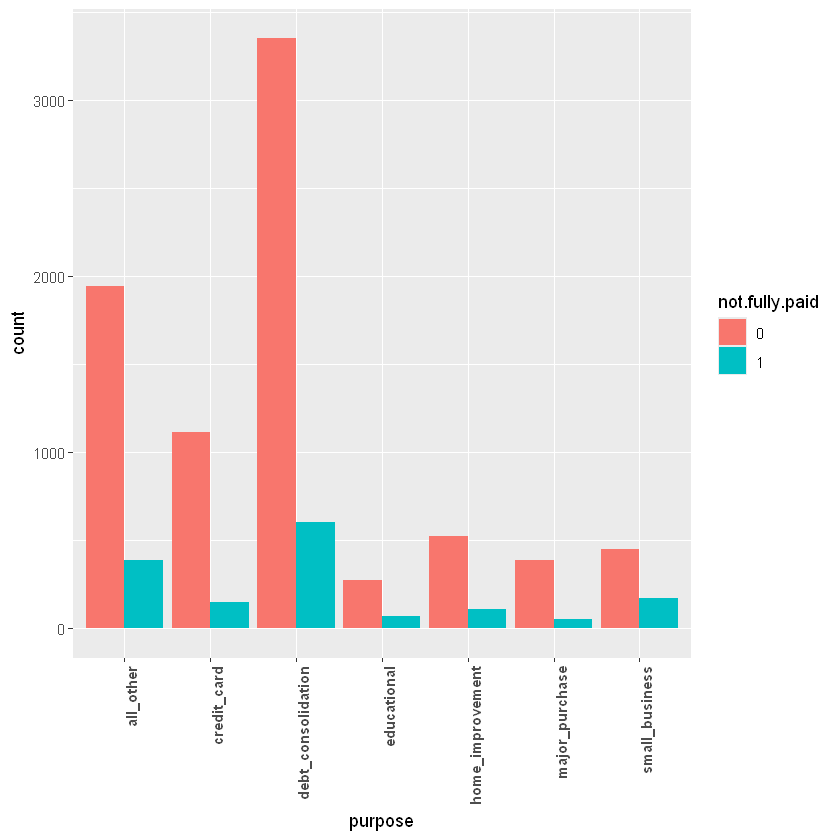

In [4]:
df$purpose <- factor(df$purpose)
pl2 <- ggplot(df, aes(x=purpose)) + geom_bar(aes(fill=not.fully.paid), position='dodge') +theme(axis.text.x = element_text(angle=90, hjust=1, face='bold'))
pl2

#### Scatter plot of fico vs. int.rate

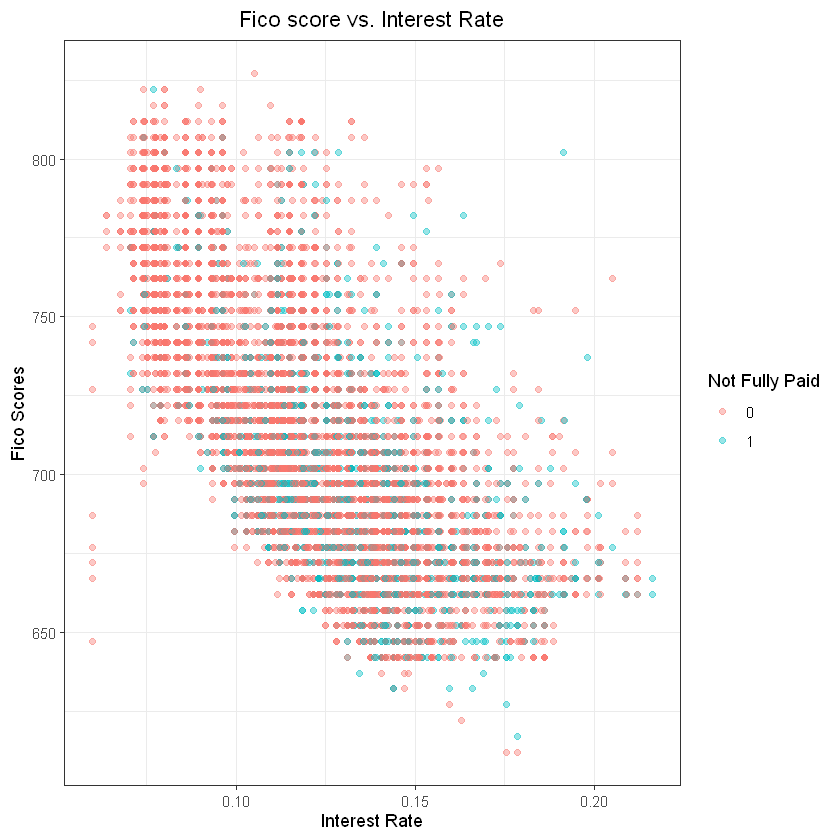

In [5]:
pl3 <- ggplot(df, aes(x=int.rate, y=fico)) + geom_point(aes(color=not.fully.paid), alpha=0.4) + labs(y="Fico Scores", x="Interest Rate", title = "Fico score vs. Interest Rate", color="Not Fully Paid") + theme_bw() + theme(plot.title=element_text(hjust=0.5))
print(pl3)

## Build SVM model

#### Train and Test Split

In [12]:
library(caTools)
library(dplyr)
set.seed(101)
split <- sample.split(df$not.fully.paid, SplitRatio=0.7)
train <- filter(df, split == T)
test <- filter(df, split == F)

library(e1071)
# Build model on training dataset
model <- svm(not.fully.paid ~ ., data=train)
summary(model)


Call:
svm(formula = not.fully.paid ~ ., data = train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  2849

 ( 1776 1073 )


Number of Classes:  2 

Levels: 
 0 1




In [13]:
model$gamma

[1] 0.01724138

In [14]:
# Predict Based on current value
predicted.values <- predict(model, test)
print(table(predicted.values, test$not.fully.paid))

                
predicted.values    0    1
               0 2413  460
               1    0    0


## Tuning Model

In [27]:
tuned_model <- tune(svm, train.x= not.fully.paid ~., data= train, kernel='radial',ranges=list(cost=c(10), gamma = c(0.1)))

In [28]:
summary(tuned_model)


Error estimation of 'svm' using 10-fold cross validation: 0.1703232


In [34]:
tuned_svm1 <- svm(not.fully.paid ~ ., data=train, cost = 100, gamma=0.1)
predicted.values <- predict(tuned_svm, test[1:13])
print(table(predicted.values, test$not.fully.paid))
confusion_matrix = table(predicted.values, test$not.fully.paid)


                
predicted.values    0    1
               0 2179  358
               1  234  102


In [35]:
accuracy =  sum(diag(confusion_matrix))/ sum(confusion_matrix)
print('accuracy')
print(accuracy)
precision = confusion_matrix[2,2] / sum(confusion_matrix[,2])
print('precision')
print(precision)
print('recall')
recall = confusion_matrix[2,2] / sum(confusion_matrix[2,])
print(recall)

[1] "accuracy"
[1] 0.7939436
[1] "precision"
[1] 0.2217391
[1] "recall"
[1] 0.3035714
